<a href="https://colab.research.google.com/github/husthorng/ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [55]:
print(diabetes_y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [42]:
DF = pd.DataFrame(diabetes_X)
DF.to_csv("diabetes_X.csv")
DF = pd.DataFrame(diabetes_y)
DF.to_csv("diabetes_y.csv")

In [56]:

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


In [ ]:
diabetes_X = diabetes_X[:, np.newaxis, 2]
indices = np.random.permutation(len(diabetes_X))
n_test_samples = 20
diabetes_X_train = diabetes_X[indices[:-n_test_samples]]
diabetes_y_train = diabetes_y[indices[:-n_test_samples]]
diabetes_X_test = diabetes_X[indices[-n_test_samples:]]
diabetes_y_test = diabetes_y[indices[-n_test_samples:]]
print(diabetes_X_train[:4], diabetes_y_train[:4])
print(diabetes_X_test[:4], diabetes_y_test[:4])

In [ ]:
diabetes_X_test

array([[ 0.07786339],
       [-0.03961813],
       [ 0.01103904],
       [-0.04069594],
       [-0.03422907],
       [ 0.00564998],
       [ 0.08864151],
       [-0.03315126],
       [-0.05686312],
       [-0.03099563],
       [ 0.05522933],
       [-0.06009656],
       [ 0.00133873],
       [-0.02345095],
       [-0.07410811],
       [ 0.01966154],
       [-0.01590626],
       [-0.01590626],
       [ 0.03906215],
       [-0.0730303 ]])

In [44]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_,regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))



Coefficients: 
 [938.23786125] 152.91886182616113
Mean squared error: 2548.07
Coefficient of determination: 0.47


In [45]:
diabetes_y_pred
DF = pd.DataFrame(diabetes_y_pred)
DF.to_csv("diabetes_y_pred.csv")

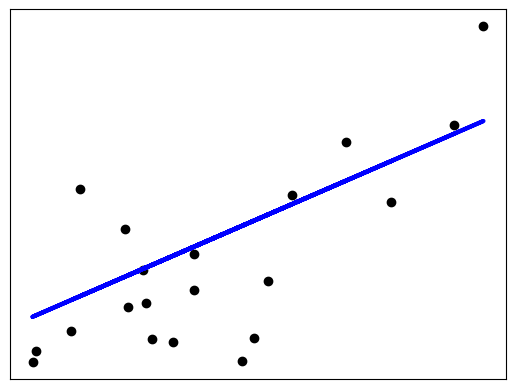

In [46]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()